In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

In [ ]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

In [ ]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n {}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_test_scaled.max(axis=0)))

In [ ]:
# import plotting libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import mglearn

# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately so test set for model is truly unknown
# DO NOT DO THIS! For illustration purposes only.
# pretend we do not have this information
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

In [ ]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learn an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

In [ ]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learn an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

In [ ]:
import numpy as np

fig, axes = plt.subplots(10, 3, figsize=(10, 30))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
print(cancer.data.shape)

for i in range(30):
  _, bins = np.histogram(cancer.data[:, i], bins=50)
  ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
  ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")

In [ ]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [ ]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

In [ ]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [ ]:
print("PCA component shape: {}".format(pca.components_.shape))

In [ ]:
print('PCA components:\n{}'.format(pca.components_))

In [ ]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['First component', 'Second component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')

In [ ]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

# plot images of people
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])
people.target.min(), people.target.max(), len(people.target)

In [ ]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

In [ ]:
# count how often each target appears
counts = np.bincount(people.target)
print(counts)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
  print("{0:25} {1:3}".format(name, count), end='   ')
  if (i + 1) % 3 == 0:
    print()

In [ ]:
mask = np.zeros(people.target.shape, dtype=bool)

# np.where(people.target == target)[0][:50]] = 1
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
print(X_people.shape, y_people.shape)
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

In [ ]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

In [ ]:
print("pca.components_.shape: {}".format(pca.components_.shape))

In [ ]:
fix, axes = plt.subplots(4, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())): 
  ax.imshow(component.reshape(image_shape), cmap='viridis')
  ax.set_title("{}. component".format((i + 1)))

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
print(X_train_nmf.shape), print(X_test_nmf.shape)

fix, axes = plt.subplots(8, 5, figsize=(15, 24), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape), cmap='viridis')
  ax.set_title("{}. component".format((i + 1)))

In [ ]:
compn = 31
# sort by 3rd component
inds = np.argsort(X_train_nmf[:, compn])[::-1]
# plot images largest 3rd component values
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())): 
  ax.imshow(X_train[ind].reshape(image_shape))
  ax.set_title("{}. component".format((i + 1)))

compn = 20
# sort by 7th component
inds = np.argsort(X_train_nmf[:, compn])[::-1]
# plot images largest 7th component values 
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
  ax.imshow(X_train[ind].reshape(image_shape))
  ax.set_title("{}. component".format((i + 1)))

In [ ]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel('Time')
plt.ylabel('Signal')
S.shape, S[0].shape

In [ ]:
# mix data into a 100-dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

In [ ]:
a = np.ones([9, 5, 7, 4])
c = np.ones([9, 5, 4, 3])
np.dot(a, c).shape
np.matmul(a, c).shape

In [ ]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X) 
print("Recovered signal shape: {}".format(S_.shape))

In [ ]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

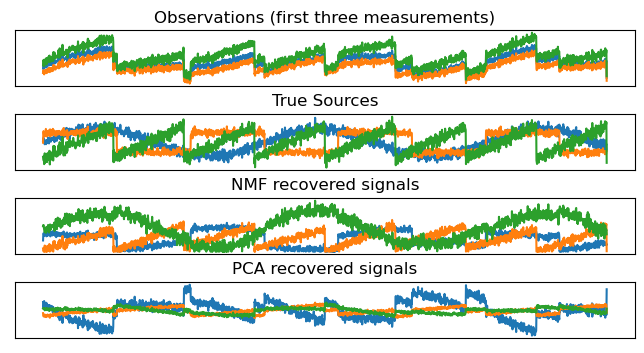

In [218]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)', 'True Sources', 'NMF recovered signals', 'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
  ax.set_title(name)
  ax.plot(model[:, :3], '-')